## EDA with Visualization

#### Importing libraries and defining aixiliary functions

In [1]:
#import piplite
#await piplite.install(['numpy'])
#await piplite.install(['pandas'])
#await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [3]:
#from js import fetch
#import io

#URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
#resp = await fetch(URL)
#dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
#df=pd.read_csv(dataset_part_2_csv)
#df.head(5)

In [4]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
df = pd.read_csv(url)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


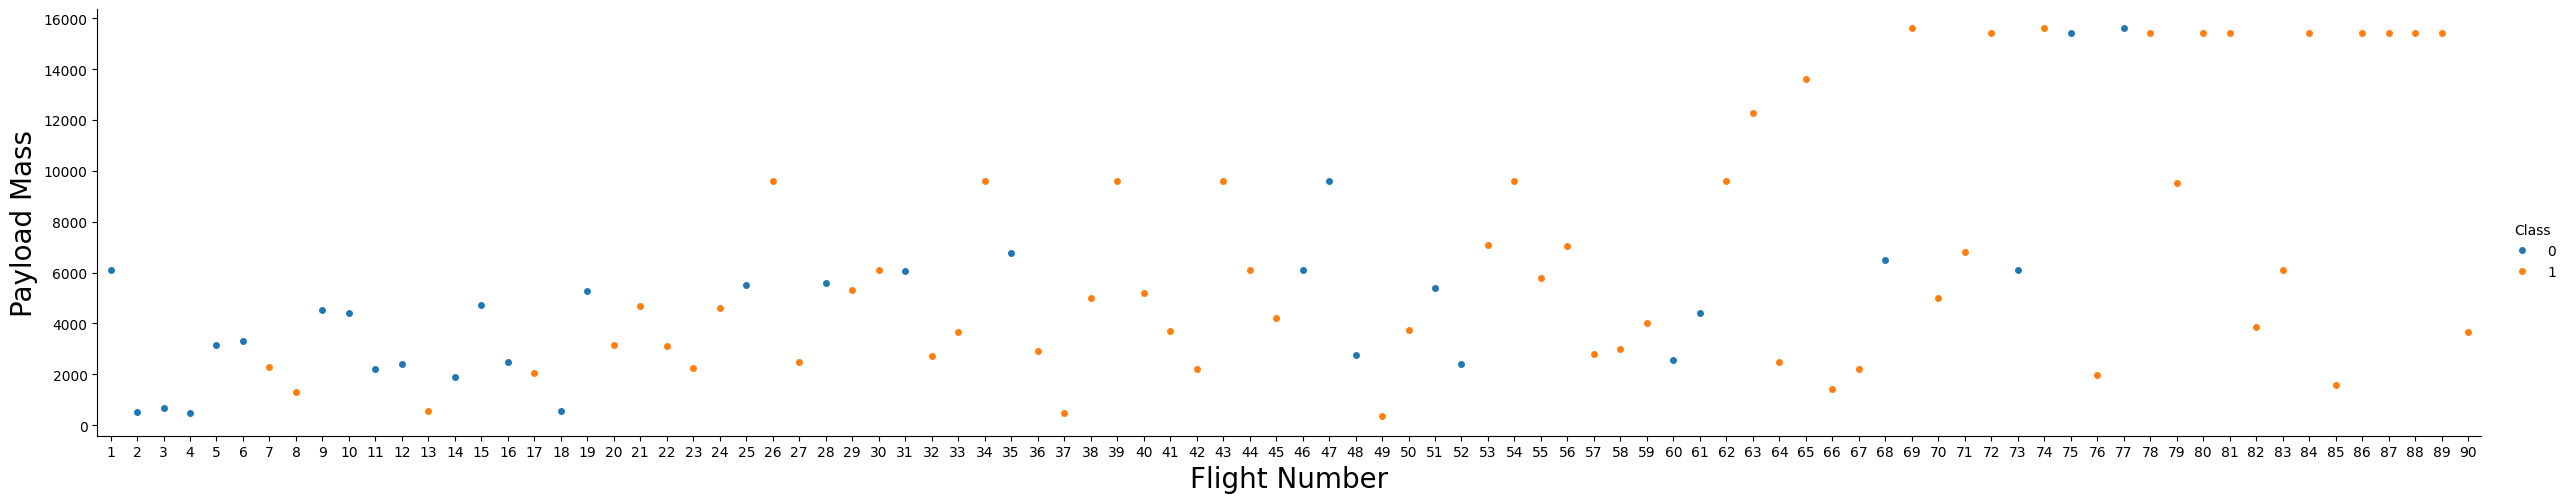

In [5]:
# Plot FlightNumber vs PayloadMass and overlay the outcome of launch

sns.catplot(y = 'PayloadMass', x = 'FlightNumber', hue = 'Class', data = df, aspect = 5)
plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Payload Mass', fontsize = 20)
plt.show()

#### Task 1: Visualiza the relationship between FlightNumber and LaunchSite

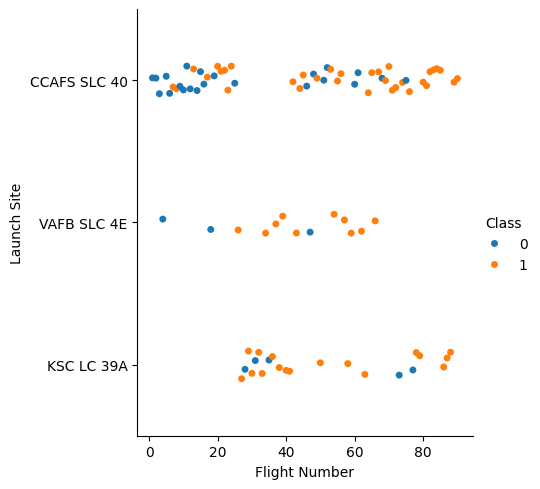

In [6]:
# Use the function catplot to plot FlightNumber vs launchSite, set the x parameter to FlightNumber,
# y parameter to LaunchSite and set the parameter hue to Class

sns.catplot(x = 'FlightNumber', y = 'LaunchSite', data = df, hue = 'Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()

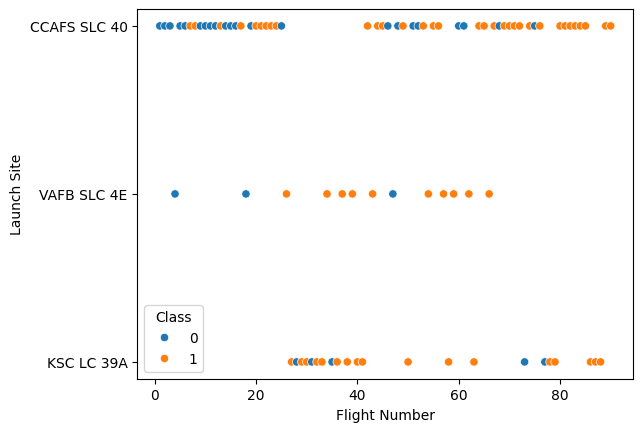

In [7]:
# Plot a scatter point chart with x-axis to be FlightNumber and y-axis to be LaunchSite and hue to Class value

sns.scatterplot(x = 'FlightNumber', y = 'LaunchSite', data = df, hue = 'Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()

In [8]:
# Observations from the above scatter plot:
#    Most of the launches are taking place from the "CCAFS SLC 40" launch site which also seems to be the only launch site being used for initial launches.
#    "VAFB SLC 4E" and "KSC LC 39A" are not used very frequently.

#### Task 2: Visualize the relationship between PayloadMass and LaunchSite

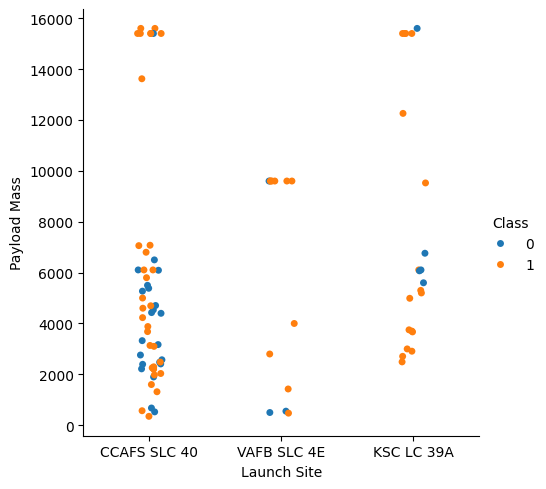

In [9]:
# Observe if there is any relationship between launch site and payload mass

sns.catplot(x = 'LaunchSite', y = 'PayloadMass', data = df, hue = 'Class')
plt.xlabel('Launch Site')
plt.ylabel('Payload Mass')
plt.show()

In [10]:
# Observations: "CCAFS SLC 40" and "KSC LC 39A" are the only launch sites being used for launches with heavy payload mass.
#     "VAFB SLC 4E" is only being used for light-weight and medium-weight payload mass launches.

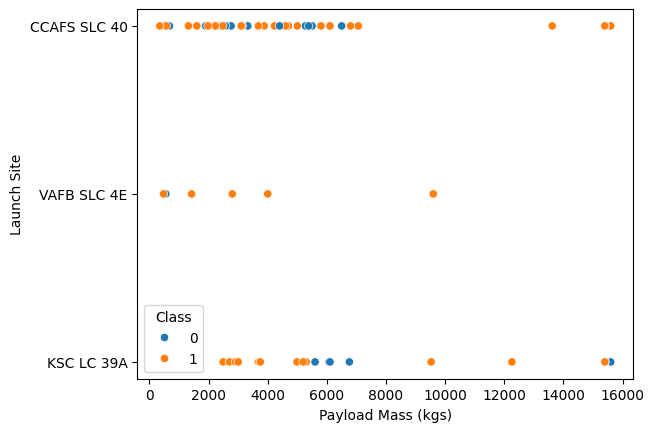

In [11]:
# Plot a scatter point chart with x-axis to be payload mass, y axis to be the launch site, and hue to be the class value

sns.scatterplot(x = 'PayloadMass', y = 'LaunchSite', data = df, hue = 'Class')
plt.xlabel('Payload Mass (kgs)')
plt.ylabel('Launch Site')
plt.show()

#### Task 3: Visualize the relationship between success rate of each orbit type

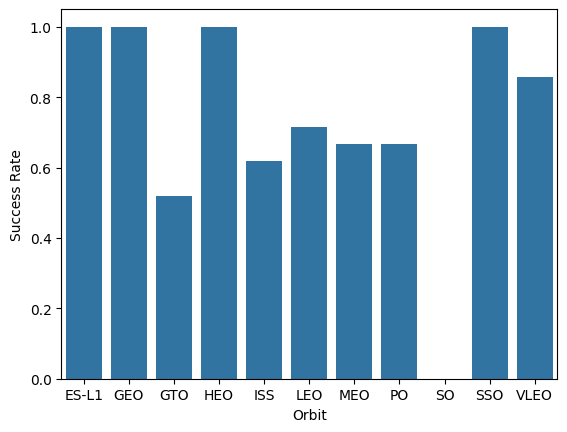

In [12]:
df_orbit = df.groupby(by = 'Orbit', as_index = False)['Class'].mean()
sns.barplot(x = 'Orbit', y = 'Class', data = df_orbit)
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.show()

In [13]:
# Observations: The success rate is 100% for the following orbits: "ES-L1", "GEO", "HEO" and "SSO".
# However, for the orbit "SO", the success rate is 0% (although our dataset has only one launch record for this orbit)

#### Task 4: Visualize the relationship between Flight number and Orbit type

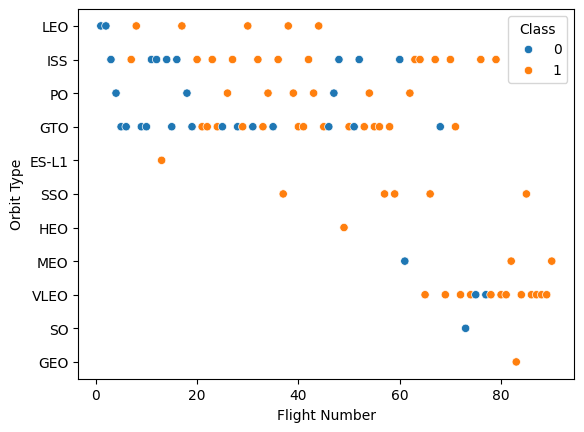

In [14]:
sns.scatterplot(x = 'FlightNumber', y = 'Orbit', data = df, hue = 'Class')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.show()

In [15]:
# Observation: For "LEO" orbit, as flight number is increasing, success rate is going up.
#   No visible relationship between flight number and success rate for "GTO" orbit.

#### Task 5: Visualize the relationship between Payload and Orbit type

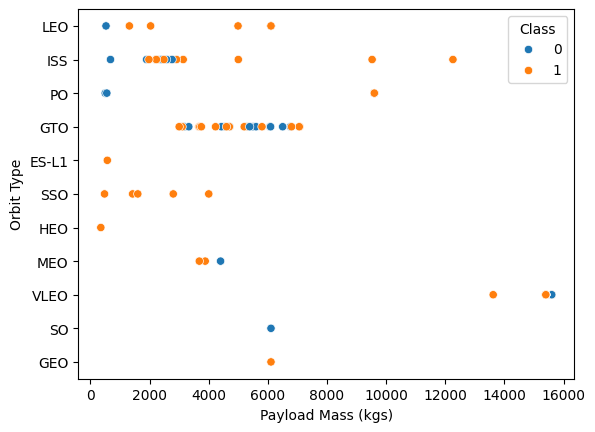

In [16]:
sns.scatterplot(x = 'PayloadMass', y = 'Orbit', data = df, hue = 'Class')
plt.xlabel('Payload Mass (kgs)')
plt.ylabel('Orbit Type')
plt.show()

In [17]:
# Observation: Most of the high payload launches have been sent to "ISS" and "VLEO" orbit types, among which "ISS" has the highest success rate (going up for high payload masses).
#   Most of the mid-payload mass launches are sent to "GTO" orbit, where there does not seem to be any relationship between success rate and payload mass.
#   For "LEO" orbit, success rate has gone up with increase in payload mass.

#### Task 6: Visualize the launch success yearly trend

In [18]:
# Extract the year from Date column

# my method
#import datetime
#df['Year'] = list(map(str, pd.to_datetime(df['Date']).dt.year))

# lab's method

year = []
def Extract_year():
  for i in df['Date']:
    year.append(i.split('-')[0])
  return year

Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


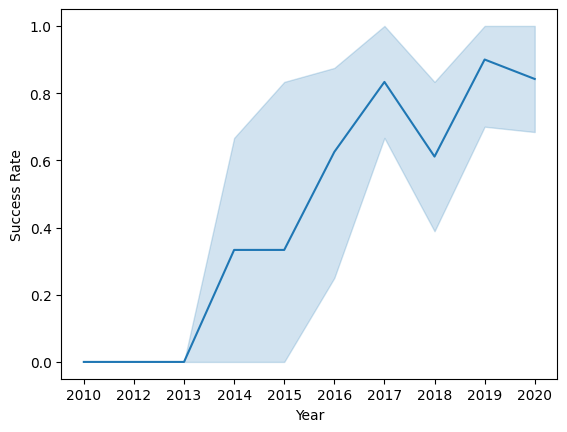

In [19]:
sns.lineplot(x = 'Date', y = 'Class', data = df)
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()

In [20]:
# Observation: Success rate has consistently gone up since 2013, except for a decline (of about 20%) in 2018.

#### Feature Engineering

In [21]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


#### Task 7: Create dummy variables for categorical columns

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [22]:
features_one_hot = pd.get_dummies(features, columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Task 8: Cast all numeric columns to <code>float64</code>

In [23]:
# All the columns in features_one_hot are now of numeric type (or can be converted to numeric type)

for col in features_one_hot.columns:
  features_one_hot[col] = features_one_hot[col].astype('float64')

#print(features_one_hot.dtypes)

# alternate approaches
#features_one_hot = features_one_hot.astype('float64')
#features_one_hot = features_one_hot.astype({col: 'float64' for col in features_one_hot.columns})

In [24]:
#features_one_hot.to_csv('dataset_part_3.csv', index = False)